## Technical Questions

1. Data Modeling and Warehousing
Question: How do you design a schema for a new data-intensive application?
    1. First of all it is important to identify where is data comming from and on which format type
    2. Then a check up on the data is needed to understand it and get as much familiar as possible to it
    3. once checked, it is important to visualize if theres duplicated data/relations that can be normalized as mcuh as possible (depending on project nature/requirements)
    4. At this point after normalization, Fact table(s) and Dimension table(s) are now identified
    5. It is now time to generate an Entity-Relationship Diagram (ERD) with proper one-one or one-many relations
    6. Once ERD is completed, Schema can be generation based on the ERD. Paying attention on column data types and Keys
    7. When Schema is finalized it is now time to ingest/dump data into tables (tables population)

    NOTE: Make sure the source data is suitable to comply with schema requirements (data types, Nulls, etc). Also a good practice
    is to clean data as much as possible (removing unexpected characters, blank spaces, duplicated values, etc)

2. ETL/ELT Design and Implementation
Question: Describe a complex ETL pipeline you've designed. What were some of the challenges, and how did you address them?
    
    Electric Transmission Diagrams Migration Project:
    
    The requirement was to gather all required information from source data (provided by customer), then use all that extracted information and transform it to comply with some
    previously defined conversion rules. This conversion rules had to be designed due to the migration was being done between systems of different suppliers. Once data were transformed
    it was used to generate XML files, that will later be loaded into the new system which consumed those XML to populate its operational database.
    All this process was divided on different stages as follows:

    1. Identify data sources: Two data sources were identified, a set of 8k+ SVG files (Containing electric diagram data) and a MySQL database (containing electric network SCADA model data)
    2. Old vs New system mapping: In order to identify common functionalities/atributes between systems and differences.
    3. Conversion rules: from the mapping, the differences between systems were spotted, having to generate migration rules to transform/modify the differences to make them fit on the new system
    4. Once having all needed data and insights to generate a correct migration process, a Python ELT tool was developed with the following stages:
        - Extract data: This stage looped over all the 8k+ SVG files, parsed them and extracted all attribute,values from every tag, generating a list containing a dictionary per object, which
        were later dumped into a CSV file
        - Load data: On this stage, all the CSV files generated on previous stage were dumped into a MySQL DB in order to generate a warehouse on premises
        - Transform data: This stage used the data on the warehouse and transformed it based on the conversion rules. Also this transformation phase
        considered the SCADA model database, transforming the combination of this two sources in order to generate suitable data for the new system that was stored in new tables.
        The data in this new tables was used to generate an XML version of the source SVG files, which will later be used to populate the new system operational data base.

    NOTE: The procedure documentation can be found on my GitHub: https://github.com/SaurioAG/Electric_Transmission_Diagrams_Migration Code is not shared
    due to No Disclosure Agreement (NDA) with customer.

3. Data Infrastructure and Orchestration
Question: What experience do you have with managing data infrastructure on-premises or in the cloud?

    Most of my experience and projects have been on-premises enviroments.
    Databases and systems allocated on company servers, which were deployed by system integrators.
    I personaly do not have experience deploying physical infrastructure, just managing/using resources of an already deployed enviroment.
    Deploying and using ETLs, populating  relational data bases and querying data from DBs.
    Unfortunately I haven't had commercial experience with cloud enviroments.
    However I'm willing and open to learn about cloud services, AWS and GCP are on my scope.

4. Programming and Software Engineering Practices
Question: What programming languages are you most comfortable with, and what libraries do you frequently use in data engineering projects?

    Most of my experience at programming is with Python 3.10. Also I have used a variety of libraries across all the different projects I've worked on like:
    - For Data Wrangling/Analysis: pandas, numpy, PySpark, re
    - For Data Orchestration: airflow
    - For DB connections: sqlite3, psycopg2, mysql
    - For OS interaction: os, sys, glob
    - For Web scraping: requests
    - For HTML/XML/SVG parsing: bs4, xml

    Also I've proficiency queying with SQL

5. Data Security and Compliance
Question: How do you implement security measures in your data engineering projects?

    On DB side:
        Encrypting table sensitive information.
        Managing user privileges/authorities/access
    On Code:
        Avoid harcoding information that can compromise servers/data
        Use enviroment variables to retrieve data like users, passwords, mac addresses, ip addresses
    On server OS:
        User Authentication
        Audit Logging and Monitoring

Please explain how you ussually follow CI/CD pipelines

    Some of the practices I consider to preserve a good CI/CD pipelines health are:
    1. Using version control: To have an historic of bug fixes, enhancements, new features, customer change requirements, etc.
    2. Code Testing: wether unit testing, integrtation testing, smoke testing, end to end testing.
    3. Iterative improvement: Code is never finished, as it can be continuously improved due to previous projects lessons learned, customer feedback, customer change requirements.

## Code Chanllenge SQL

Code Challenge Description
Title: Building a MySQL Database Interface in Python

Objective:
You are tasked with creating a Python application that interfaces with a MySQL database. The application will manage a dataset representing sales data for a tech company that sells various products across multiple countries. Your goal is to establish a database connection, create a table, and populate this table with sample data.

Tasks:

Create a Database Connection:
Implement a Python function to establish a connection to a MySQL database using provided credentials (host, username, password, and database name).
Define and Create a Table:
Write SQL commands within your Python script to create a table named sales. This table should have columns for id, country, category, price, quantity, and final_sales, with appropriate data types.
Insert Data:
Prepare a series of SQL INSERT statements to populate the sales table with the provided sample data. Ensure each record accurately reflects the sales data format.
Execute Queries:
Write functions to execute SQL queries to create the table and insert data into the table. Include error handling to manage potential SQL execution errors.
Expected Deliverables:

A Python script that can be run to connect to a MySQL database, create the necessary table, and populate it with data.
Your script should handle common errors that might occur during database operations, such as connection failures or SQL syntax errors.
Evaluation Criteria:

Correctness: The script should correctly execute all database operations without errors.

Code Quality: Code should be clear, well-organized, and appropriately commented.

Error Handling: The script should effectively handle and report errors during database operations.

Efficiency: SQL operations should be written efficiently to optimize execution.

Setup Instructions
Just use mysql local community server and a made up data set related to sales of devices in a tech company 
https://dev.mysql.com/downloads/mysql/

Table 1 Sales 
    product_id ,
    country ,
    category ,
    price ,
    quantity ,
    final_sales
    
Table 2 Product
    id  PRIMARY KEY,
    category ,
    capacity ,
    color ,
    screen_size ,
    memory ,
    other_specs .
Ensure you have mysql-connector-python installed in your environment. If not, you can install it using pip install mysql-connector-python.

Tips for Success
Test each part of your script incrementally to ensure that each function behaves as expected.
Consider the edge cases, such as what happens if the table already exists or the database connection cannot be established.

This challenge is designed to test your ability to integrate Python programming with SQL database management, reflecting tasks you may handle as a data engineer in our organization. Good luck!


In [1]:
!pip install mysql-connector-python

## Create a MySQL Database using Python
### First, you need to connect to your MySQL server and create a new database.


In [1]:
import mysql.connector as conn
import random
import pandas as pd

def db_conn(host_id: str, user_id: str, psw: str):
    """
    Handles the connection to a MySQL server to "sales" Data Base
    Receives DB connection credentials in order to connect to DB.
    """
    try:
        connection = conn.connect(
            host = host_id,
            # database = db_name,
            user = user_id,
            password = psw)
    except conn.errors.DatabaseError as error:
        if "2003" in  str(error):
            return print(f'An exception has occurred: {error}. Server is not reachable')
        elif "1045" in str(error):
            return print(f'An exception has occurred: {error}. Any of the provided credentials is incorrect')
        elif "1049" in str(error):
            """
            Unknown database 
            """
            pass
        else:
            return print(f'An exception has occurred: {error}.')
    return connection

def db_cursor(db_connection):
    """
    Generates a cursos object in order to handle queries to "sales" Data Base
    """
    cursor = db_connection.cursor()
    return cursor

def create_database(db_connection, cursor, db_name: str):
    """
    Creates sales DB
    """
    query = f'CREATE DATABASE IF NOT EXISTS {db_name}\
        CHARACTER SET=utf8mb4\
        COLLATE=utf8mb4_bin\
        ENCRYPTION="N"'
    cursor.execute(query)
    print(f'Creating Data Base')
    db_connection.commit()


In [2]:
host_id = input(f'Provide host: ')
db_name = input(f'To which DB you want to connect? ')
user_id= input(f'User: ')
psw = input(f'Pass: ')

connection = db_conn(host_id, user_id, psw)
if connection is not None:
    cursor = db_cursor(connection)
    create_database(connection, cursor, db_name)

Creating Data Base


## Insert Data into the sales Table
### The following Python script shows how to insert data into the sales table. We'll be adding rows using a batch insert for efficiency.

In [5]:
def create_sales_table(db_connection, cursor, db_name: str):
    """
    Creates a table "sales" on the  Data base
    """
    try:
        query = f'CREATE TABLE {db_name}.sales (\
            product_id int NOT NULL ,\
            country varchar(256) NOT NULL,\
            category varchar(128) NOT NULL,\
            price double NOT NULL,\
            quantity int NOT NULL,\
            final_sales double NOT NULL\
        ) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_bin'
        
        cursor.execute(query)
        print(f'Creating sales table')
        db_connection.commit()
    except conn.errors.ProgrammingError as error:
        print(f'An exception has ocurred: {error}')
        response = input(f'Do you want to remove existing table and create a new one? (yes/no) ')
        if response.lower() == "yes":
            drop_query = f'DROP TABLE {db_name}.sales'
            cursor.execute(drop_query)
            db_connection.commit()
            cursor.execute(query)
            db_connection.commit()
            return print("New table sales has been created")
        else:
            return print("Keep exisitng sales table")

def generate_sales_data() -> list:
    """
    A function that generates a list of tupples with random sales data and a list with unique product ids
    """
    country = ["Mexico", "Canada", "US"]
    category = ["phone", "tablet", "laptop"]
    ids = [id for id in range(1, 11)]
    list_of_rows = [(random.choice(ids), random.choice(country),
                        random.choice(category), random.randint(3000, 30000),
                        random.randint(1,10), random.randint(3000, 100000))
                        for item in range(0, 100)]
    id_list = list(set([row[0] for row in list_of_rows]))
    print(id_list)
    return list_of_rows, id_list

def populate_sales_table(records: list, cursor, db_connection, db_name: str):
    """
    Receives a list of tupples that contain each row data for the "sales" table.
    Each tupple element should match the data type deffined on the table schema
    """
    try:
        full_query = f'INSERT INTO {db_name}.sales (product_id, country, category, price, quantity, final_sales) VALUES'
        for row in records:
            values = f'({row[0]}, "{row[1]}", "{row[2]}", {row[3]}, {row[4]}, {row[5]}),'
            if type(row[1]) != str or type(row[2]) != str:
                return print(f'You are trying to use a number on a string field. row: {row}')
            else:
                full_query = f'{full_query} {values}'
        cursor.execute(full_query[:len(full_query)-1])
        print(f'Populating sales table')
        db_connection.commit()
    except conn.errors.ProgrammingError as error:
        if "1064" in str(error):
            return print(f'You are trying to fill a field with an empty value. Fields do not accept NULL values.')
        elif "1054" in str(error):
            return print(f'You are trying to fill a field with incorrect data type.')
        else:
            return print(f'An exception has ocurred: {error}')
    except IndexError:
        return print(f'The row you are trying to populate is missing a value. It should have 6 values on it.')


In [7]:
create_sales_table(connection, cursor, db_name)
sales_data = generate_sales_data()
populate_sales_table(sales_data[0], cursor = cursor, db_connection = connection, db_name = db_name)
sales_df = pd.DataFrame(sales_data[0], columns = ["product_id", "country", "category", "price", "quantity", "final_sales"])
print(sales_df)

An exception has ocurred: 1050 (42S01): Table 'sales' already exists
New table sales has been created
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Populating sales table
    product_id country category  price  quantity  final_sales
0            7  Canada   tablet  17720         9        76393
1            2  Canada   tablet   6610         4        58201
2            4  Canada   tablet  26574         9        83470
3            4  Mexico    phone  16263        10        99147
4            5  Canada   laptop  24646         1        33662
..         ...     ...      ...    ...       ...          ...
95          10  Mexico    phone   9468         7        55110
96           7      US   tablet  11149         2        99203
97          10  Mexico    phone  10951         7        37471
98           5  Mexico   laptop  27992         7        45883
99           5  Mexico   tablet   6357         5        56419

[100 rows x 6 columns]


## Code to Create the product Table
### First, here's the SQL command to create the product table with various specifications:

In [16]:
def create_product_table(db_connection, cursor, db_name: str):
    """
    Creates a table "product" on the  Data base
    """
    try:
        query = f'CREATE TABLE {db_name}.product (\
            id int NOT NULL,\
            category varchar(128) NOT NULL,\
            capacity int NOT NULL,\
            color varchar(128) NOT NULL,\
            screen_size int NOT NULL,\
            memory int NOT NULL,\
            other_specs varchar(128) NOT NULL,\
            PRIMARY KEY (id)\
        ) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_bin'
        
        cursor.execute(query)
        print(f'Creating product table')
        db_connection.commit()
    except conn.errors.ProgrammingError as error:
        print(f'An exception has ocurred: {error}')
        response = input(f'Do you want to remove existing table and create a new one? (yes/no) ')
        if response.lower() == "yes":
            drop_query = f'DROP TABLE {db_name}.product'
            cursor.execute(drop_query)
            db_connection.commit()
            cursor.execute(query)
            db_connection.commit()
            return print("New table product has been created")
        else:
            return print("Keep exisitng product table")

def generate_product_data(sales_ids: list) -> list:
    """
    A function that generates a list of tupples with random IT product data. Which receives a list of unique product ids from sales data.
    Te received list ensures to have unique product ids (Keys) on the product table.
    """
    list_of_rows = []
    ids = sales_ids
    category = ["phone", "tablet", "laptop"]
    capacity = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
    color = ["white", "black", "red", "blue", "pink"]
    size = [5, 6, 7, 8, 9, 10, 12, 15, 17]
    specs = ["fast_charge", "usb_c", "5G"]
    list_of_rows = [(ids.pop(0), random.choice(category),
                     random.choice(capacity), random.choice(color),
                     random.choice(size), random.choice(capacity),
                     random.choice(specs)) for item in range(0, 10)]
    return list_of_rows

def populate_product_table(records: list, cursor, db_connection, db_name: str):
    """
    Receives a list of tupples that contain each row data for the "product" table.
    Each tupple element should match the data type deffined on the table schema
    """
    try:
        full_query = f'INSERT INTO {db_name}.product (id, category, capacity, color, screen_size, memory, other_specs) VALUES'
        for row in records:
            values = f'({row[0]}, "{row[1]}", {row[2]}, "{row[3]}", {row[4]}, {row[5]}, "{row[6]}"),'
            if type(row[1]) != str or type(row[3]) != str or type(row[6]) != str:
                return print(f'You are trying to use a number on a string field. row: {row}')
            else:
                full_query = f'{full_query} {values}'
        cursor.execute(full_query[:len(full_query)-1])
        print(f'Populating product table')
        db_connection.commit()
    except conn.errors.ProgrammingError as error:
        if "1064" in str(error):
            return print(f'You are trying to fill a field with an empty value. Fields do not accept NULL values.')
        elif "1054" in str(error):
            print(error)
            return print(f'You are trying to fill a field with incorrect data type.')
        else:
            return print(f'An exception has ocurred: {error}')
    except IndexError:
        return print(f'The row you are trying to populate is missing a value. It should have 7 values on it.')

## Python Code to Execute the Table Creation and Insert Data
### Now, let's integrate this into your Python script to create the table and then populate it with some sample data(please just create dummy data ):

In [9]:
create_product_table(connection, cursor, db_name)
product_data = generate_product_data(sales_data[1])
populate_product_table(product_data, cursor = cursor, db_connection = connection, db_name = db_name)
product_df = pd.DataFrame(product_data, columns = ["id", "category", "capacity", "color", "screen_size", "memory", "other_specs"])
print(product_df)

An exception has ocurred: 1050 (42S01): Table 'product' already exists
New table product has been created
Populating product table
   id category  capacity  color  screen_size  memory  other_specs
0   1    phone       512   blue            8       1  fast_charge
1   2   laptop         1   pink            6       4  fast_charge
2   3   tablet        16    red           15      16           5G
3   4   tablet       128  white            7       1        usb_c
4   5    phone         2   blue            7     256        usb_c
5   6   tablet       256  white            7      32  fast_charge
6   7   tablet       256  white           17       4           5G
7   8    phone       512   pink           15      64           5G
8   9    phone       128  black           17     256           5G
9  10    phone         4  black            7      64  fast_charge


## Use Case: Detailed Sales Analysis
### Objective:

Determine the top-selling product categories in each country.
Retrieve detailed product specifications for these top-selling products.
Provide additional insights like the total number of distinct products sold and the maximum sales recorded for each category.

In [28]:
def top_sell_country_category(db_connection, cursor, db_name: str):
    """
    Determines the top-selling product categories in each country.
    """
    try:
        query = f'CREATE TABLE {db_name}.top_sell_country_category AS (\
                    SELECT product_id, country, category, total\
                        FROM (\
                            SELECT product_id, country, category, sum(final_sales) AS total,\
                                ROW_NUMBER() OVER (PARTITION BY country ORDER BY SUM(final_sales) DESC) AS category_rank\
                                FROM {db_name}.sales\
                                GROUP BY country, category) AS rank_table\
                    WHERE category_rank = 1)'
        cursor.execute(query)
        print(f'Creating top_sell_country_category table')
        db_connection.commit()
        result = cursor.fetchall()
        dataframe = pd.DataFrame(result, columns=["Product_id", "Country", "Category", "Total_sales"])
    except conn.errors.ProgrammingError as error:
        print(f'An exception has ocurred: {error}')
        response = input(f'Do you want to remove existing table and create a new one? (yes/no) ')
        if response.lower() == "yes":
            drop_query = f'DROP TABLE {db_name}.top_sell_country_category'
            cursor.execute(drop_query)
            db_connection.commit()
            cursor.execute(query)
            db_connection.commit()
            cursor.execute(f'SELECT * FROM {db_name}.top_sell_country_category')
            result = cursor.fetchall()
            dataframe = pd.DataFrame(result, columns=["Product_id", "Country", "Category", "Total_sales"])
            print("New table top_sell_country_category has been created")
            return dataframe
        else:
            return print("Keep exisitng top_sell_country_category table")

def top_product_specs(cursor, db_name: str):
    """
    Retrieves detailed product specifications for these top-selling products
    """
    query = f'SELECT p.*, tscc.country, s.final_sales\
                FROM {db_name}.product p\
                JOIN\
                    {db_name}.top_sell_country_category tscc ON tscc.product_id = p.id\
                JOIN \
                    {db_name}.sales s ON tscc.product_id = s.product_id'
    cursor.execute(query)
    result = cursor.fetchall()
    dataframe = pd.DataFrame(result, columns=["id", "Category", "Capacity", "Color", "Screen_size", "Memory", "Other_specs", "Country", "Final_sales"])
    return dataframe

def total_distinct_products_sold(cursor, db_name: str):
    """
    Determines the total number of distinct products sold
    """
    query = f' SELECT \
	                DISTINCT product_id,\
                    sum(quantity) \
                    FROM {db_name}.sales\
	                GROUP BY product_id'
    cursor.execute(query)
    result = cursor.fetchall()
    dataframe = pd.DataFrame(result, columns=["Product_id", "Total_sold"])
    return dataframe

def max_sales_category(cursor, db_name: str):
    """
    A query that determines the maximum sales recorded for each category
    """
    query = f' SELECT \
	                DISTINCT category,\
                    sum(final_sales) \
                    FROM {db_name}.sales\
	                GROUP BY category'
    cursor.execute(query)
    result = cursor.fetchall()
    dataframe = pd.DataFrame(result, columns=["Category", "Total_sales"])
    return dataframe



In [30]:
print("top-selling product categories in each country")
print(top_sell_country_category(connection, cursor, db_name))

print("product specifications for the top-selling products")
print(top_product_specs(cursor, db_name))


top-selling product categories in each country
An exception has ocurred: 1050 (42S01): Table 'top_sell_country_category' already exists
New table top_sell_country_category has been created
   Product_id Country Category  Total_sales
0           4  Canada    phone     629935.0
1           1  Mexico   tablet     861812.0
2          10      US   tablet     646149.0
product specifications for the top-selling products
    id Category  Capacity  Color  Screen_size  Memory  Other_specs Country  \
0    4   tablet       128  white            7       1        usb_c  Canada   
1    4   tablet       128  white            7       1        usb_c  Canada   
2   10    phone         4  black            7      64  fast_charge      US   
3    4   tablet       128  white            7       1        usb_c  Canada   
4   10    phone         4  black            7      64  fast_charge      US   
5   10    phone         4  black            7      64  fast_charge      US   
6   10    phone         4  black     

In [31]:
print("total number of distinct products sold")
print(total_distinct_products_sold(cursor, db_name))

print("maximum sales recorded for each category")
print(max_sales_category(cursor, db_name))

total number of distinct products sold
   Product_id Total_sold
0           7         94
1           2         30
2           4         55
3           5         94
4           8         60
5          10         60
6           3         28
7           9         70
8           6         52
9           1         47
maximum sales recorded for each category
  Category  Total_sales
0   tablet    1872685.0
1    phone    1671575.0
2   laptop    1369935.0


## Code Chanllenge ETL on Python
### ETL Code Challenge Description
#### Title: ETL Process Simulation for Tech Company Sales Data

Objective:
Develop a Python-based ETL (Extract, Transform, Load) process that integrates data from multiple sources, applies specific transformations, and then loads the transformed data into a new table. This challenge tests your ability to handle data programmatically, showcasing your skills in data manipulation, SQL integration, and Python programming.

Background:
A tech company has multiple tables storing sales and product details. The sales table records transactions including the country, product category, and sales details. The product table includes specifications like capacity and color. Your task is to extract data from these tables, apply transformations to derive new insights, and load the results into a new structured format.

Tasks:

Extract:
Write a Python function to retrieve data from the existing sales and product tables. The extracted data should include country, category, product capacity, color, quantity sold, and final sales amount.
Transform:
Implement transformations to calculate the total revenue for each product (defined as quantity * final_sales).
Categorize each transaction based on sales volume into 'High', 'Medium', or 'Low'.
Load:
Design and create a new table called transformed_sales to store the transformed data.
Load the transformed data into this table with appropriate field names and data types.
Expected Deliverables:

A Python script that implements the ETL process.
The script should include functions for connecting to a MySQL database, executing SQL queries, and handling any potential errors.
Documentation within the script explaining the purpose and functionality of each part of the code.
Evaluation Criteria:

Correctness: The script should correctly execute all steps of the ETL process without errors.
Efficiency: Code and queries should be optimized for performance, especially when handling large datasets.
Code Quality: The code should be well-organized, properly commented, and easy to read.
Error Handling: The script should include robust error handling to manage and log potential issues during the database operations.
Instructions for Execution:

Just use mysql local community server and a made up data set related to sales of devices in a tech company and tables created on SQL portion.



Overview of the ETL Process
Here's how we can structure the ETL process for your dataset:

Extract: Retrieve data from the sales and product tables.
Transform: Apply transformations to the data, such as computing additional metrics or modifying the format.
Load: Load the transformed data into a new table or update the existing tables.
1. Extract Data
First, extract data from the MySQL database using the previously established connection and query functions.

In [32]:
def extract_data_from_db(cursor, db_name: str):
    """
    Retrieve data from the existing sales and product tables. Including id, country, category, product capacity, color, quantity sold, and final sales amount
    """
    query = f'SELECT\
                s.product_id,\
                s.country,\
                p.category,\
                p.capacity,\
                p.color,\
                s.quantity,\
                s.final_sales\
                FROM {db_name}.sales s\
                JOIN {db_name}.product p ON s.product_id = p.id'
    cursor.execute(query)
    result = cursor.fetchall()
    dataframe = pd.DataFrame(result, columns = ["id", "country", "category", "capacity", "color", "quantity", "final_sales"])
    return dataframe

2. Transform Data
We will create a simple transformation function that, for example, calculates the total revenue per product and categorizes sales based on volume.

In [36]:
def transform_data(extracted):
    """
    This function Implement transformations to calculate the total revenue for each product (defined as quantity * final_sales).
    Categorize each transaction based on sales volume into 'High', 'Medium', or 'Low'.
    """
    dataframe = extracted
    dataframe["total_revenue"] = dataframe["quantity"] * dataframe["final_sales"]
    # Determine some values to set a category scale
    max_revenue = max(dataframe["total_revenue"])
    min_revenue = min(dataframe["total_revenue"])
    revenue_distance = max_revenue - min_revenue
    half_revenue = revenue_distance/2
    upper_limit = half_revenue*1.25
    lower_limit = half_revenue*0.75
    categories = []
    for revenue in dataframe["total_revenue"]:
        if upper_limit < revenue <= max_revenue:
            categories.append("High")
        elif upper_limit >= revenue >= lower_limit:
            categories.append("Medium")
        elif lower_limit > revenue >= min_revenue:
            categories.append("Low")
    dataframe["transact_category"] = categories
    list_of_rows = list(zip(*map(dataframe.get, dataframe)))
    return dataframe, list_of_rows

3. Load Data
Finally, write the transformed data back into a new table or an existing one. Here, let's assume we are creating a new table to store these results.

In [34]:
def create_transformed_sales_table(db_connection, cursor, db_name: str):
    """
    Creates a table "transformed_sales" on the  Data base
    """
    try:
        query = f'CREATE TABLE {db_name}.transformed_sales (\
            id int NOT NULL,\
            country varchar(128) NOT NULL,\
            category varchar(128) NOT NULL,\
            capacity int NOT NULL,\
            color varchar(128) NOT NULL,\
            quantity int NOT NULL,\
            final_sales double NOT NULL,\
            total_revenue double NOT NULL,\
            transact_category varchar(128) NOT NULL\
        ) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_bin'
        
        cursor.execute(query)
        print(f'Creating transformed_sales table')
        db_connection.commit()
    except conn.errors.ProgrammingError as error:
        print(f'An exception has ocurred: {error}')
        response = input(f'Do you want to remove existing table and create a new one? (yes/no) ')
        if response.lower() == "yes":
            drop_query = f'DROP TABLE {db_name}.transformed_sales'
            cursor.execute(drop_query)
            db_connection.commit()
            cursor.execute(query)
            db_connection.commit()
            return print("New table transformed_sales has been created")
        else:
            return print("Keep exisitng transformed_sales table")
        
def load_data(transformed_data: list, cursor, db_connection, db_name: str):
    """
    Receives a list of tupples that contain each row data for the "transformed_sales" table.
    Each tupple element should match the data type deffined on the table schema
    """
    try:
        full_query = f'INSERT INTO {db_name}.transformed_sales (id, country, category, capacity, color, quantity, final_sales, total_revenue, transact_category) VALUES'
        for row in transformed_data:
            values = f'({row[0]}, "{row[1]}", "{row[2]}", {row[3]}, "{row[4]}", {row[5]}, {row[6]}, {row[7]}, "{row[8]}"),'
            if type(row[1]) != str or type(row[2]) != str or type(row[4]) != str or type(row[8]) != str:
                return print(f'You are trying to use a number on a string field. row: {row}')
            else:
                full_query = f'{full_query} {values}'
        cursor.execute(full_query[:len(full_query)-1])
        print(f'Populating product table')
        db_connection.commit()
    except conn.errors.ProgrammingError as error:
        if "1064" in str(error):
            return print(f'You are trying to fill a field with an empty value. Fields do not accept NULL values.')
        elif "1054" in str(error):
            print(error)
            return print(f'You are trying to fill a field with incorrect data type.')
        else:
            return print(f'An exception has ocurred: {error}')
    except IndexError:
        return print(f'The row you are trying to populate is missing a value. It should have 9 values on it.') 

Execution of ETL Process
Now, combine these functions to perform the complete ETL process.

In [37]:
# Extracting data from DB
extracted_data = extract_data_from_db(cursor, db_name)

# Transofrming data
transformed_data = transform_data(extracted_data)

# Creating and populating transformed_sales table
create_transformed_sales_table(connection, cursor, db_name)
load_data(transformed_data[1], cursor = cursor, db_connection = connection, db_name = db_name)

print("Transformed sales data")
print(transformed_data[0])

An exception has ocurred: 1050 (42S01): Table 'transformed_sales' already exists
New table transformed_sales has been created
Populating product table
Transformed sales data
    id country category  capacity  color  quantity  final_sales  \
0    7  Canada   tablet       256  white         9      76393.0   
1    2  Canada   laptop         1   pink         4      58201.0   
2    4  Canada   tablet       128  white         9      83470.0   
3    4  Mexico   tablet       128  white        10      99147.0   
4    5  Canada    phone         2   blue         1      33662.0   
..  ..     ...      ...       ...    ...       ...          ...   
95  10  Mexico    phone         4  black         7      55110.0   
96   7      US   tablet       256  white         2      99203.0   
97  10  Mexico    phone         4  black         7      37471.0   
98   5  Mexico    phone         2   blue         7      45883.0   
99   5  Mexico    phone         2   blue         5      56419.0   

    total_revenue tra

Conclusion
This simulated ETL process in Python effectively demonstrates how to extract data from a relational database, apply meaningful transformations, and then load the processed data into a new storage system, providing practical hands-on experience with ETL concepts.

## Code Chanllenge Airflow

Title: Developing an Airflow DAG for an Automated ETL Process

Objective:
The goal of this challenge is to develop a fully functional Airflow Directed Acyclic Graph (DAG) that orchestrates an ETL (Extract, Transform, Load) process. This process involves extracting data from a source, transforming this data, and loading it into a destination system.

Background:
Automating ETL tasks is crucial for ensuring data accuracy and availability in real-time or near-real-time for analysis and decision-making. Airflow is a platform used to programmatically author, schedule, and monitor workflows.

Tasks:

Complete the Python Functions:
Extract Function: Implement logic to extract data from a predefined data source. This could be a database, a file, an API, or any simulated data source.
Transform Function: Apply necessary data transformations which could include cleaning, aggregating, or any other form of data manipulation.
Load Function: Implement the logic to load the transformed data into a specified target, which could be a database or a data warehouse.
Integrate Functions with Airflow:
Use the provided Airflow DAG skeleton to integrate your Python functions.
Configure the DAG to ensure that tasks are executed in the correct order, handling dependencies correctly.
Expected Deliverables:

A fully implemented Airflow DAG named etl_process_dag with the specified tasks (extract, transform, load).
Detailed documentation on:
The data source and data format expected.
The specific transformations applied.
The destination system and data schema.
Evaluation Criteria:

Functionality: The DAG should execute without errors, and data should flow through the ETL process as intended.
Code Quality: Code should be clean, well-commented, and follow best practices for Python and Airflow.
Error Handling: Adequate error handling should be in place to manage common failures in data extraction, transformation, and loading.
Scalability and Maintainability: The solution should be scalable and easy to maintain or modify.


In [ ]:
pip install airflow requests numpy sqlite3 bs4

In [41]:
import sqlite3
import requests
import numpy
import pandas as pd
import os
from bs4 import BeautifulSoup
from datetime import timedelta
from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from airflow.utils.dates import days_ago

# defining DAG arguments

default_args = {
    'owner': 'Roberto A.',
    'start_date': days_ago(0),
    'email': ['dummy@email.com'],
    'email_on_failure': True,
    'email_on_retry': True,
    'retries': 1,
    'retry_delay': timedelta(minutes=5)
}

dag = DAG(
    dag_id='etl_process_dag',
    default_args=default_args,
    description='Code Challenge Airflow',
    schedule_interval=timedelta(days=1)
)

# defining tasks definitions

def extract_bank_data():
    """
    Goes into given url and web scrapes data from largest banks worldwide.
    Extract just required data from a table and dumps into a CSV file
    which is stored on the parent directory of this python file (opt/airflow)
    """
    url = 'https://web.archive.org/web/20230908091635%20/https://en.wikipedia.org/wiki/List_of_largest_banks'
    request = requests.get(url)
    if request.status_code == 200:
        soup = BeautifulSoup(request.text, features="html.parser")
        all_tables = soup.find_all('tbody')
        DATA = {
            'Name': [],
            'MC_USD_Billion': []
        }

        for table in all_tables:
            headers = table.find_all('th')
            if 'Market cap' in headers[len(headers)-1]:
                market_table = table
                break

        for row in market_table.find_all('tr')[1:]:
            name_column = row.find_all('td')[1]
            print(row.find_all('td')[2].contents[0][:-1])
            DATA['Name'].append(name_column.find_all('a')[1].text.replace('\n',''))
            DATA['MC_USD_Billion'].append(row.find_all('td')[2].text.replace('\n',''))
        
        dataframe = pd.DataFrame(DATA)
        try:
            dataframe.to_csv("List_of_largest_banks.csv", index = False)
        except FileExistsError:
            os.remove("List_of_largest_banks.csv")
            dataframe.to_csv("List_of_largest_banks.csv", index = False)
    else:
        print("The server is not reachable")

def extract_exchange_rate():
    """
    Requests a csv file from a given url and extracs the data to generate a local CSV
    which is which is stored on the parent directory of this python file (opt/airflow)
    """
    url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-PY0221EN-Coursera/labs/v2/exchange_rate.csv'
    csv = requests.get(url, allow_redirects=True)
    with open('ex_rate_file.csv', 'wb') as file:
        file.write(csv.content)

def transform():
    """
    Retrieves the data stored on the CSV files generated on previous extraction steps
    transforms it and generates extra data. Then dumps it on a CSV file which is stored on the parent directory of this python file (opt/airflow)
    """
    bank_data_df = pd.read_csv("List_of_largest_banks.csv")
    ex_rates_df = pd.read_csv("ex_rate_file.csv")
    bank_data_df['MC_USD_Billion'] = numpy.float64(bank_data_df['MC_USD_Billion'])
    for rates in range(0, len(ex_rates_df)):
        column_name = f'MC_{ex_rates_df["Currency"].iloc[rates]}_Billion'
        bank_data_df[column_name] = round(bank_data_df['MC_USD_Billion']*ex_rates_df['Rate'].iloc[rates],2)
    try:
        bank_data_df.to_csv("transformed_data.csv", index = False)
    except FileExistsError:
        os.remove("transformed_data.csv")
        bank_data_df.to_csv("transformed_data.csv", index = False)
        
def load_to_db():
    """
    Generates a sqlite like db file, then gets data from the transformed_data CSV file and dumps it into DB file
    called bank_data.db which is stored on the parent directory of this python file (opt/airflow)
    """
    db_name = "bank_data.db"
    try:
        with open(db_name, "x"):
            pass
    except FileExistsError:
        os.rmdir(db_name)
        with open(db_name, "x"):
            pass
    transformed_data_df = pd.read_csv("transformed_data.csv")
    db_conn = sqlite3.connect(db_name)
    transformed_data_df.to_sql(con = db_conn, name = "transformed_data", if_exists = 'replace', index = False)
    db_conn.close()


In [ ]:
# Defining task operators

bank_data_web_scraping = PythonOperator(task_id = "bank_data_web_scraping", python_callable = extract_bank_data, dag = dag)
exchange_rate_file = PythonOperator(task_id = "get_exchange_rate", python_callable = extract_exchange_rate, dag = dag)
transforming_data = PythonOperator(task_id = "converting_currencies", python_callable = transform, dag = dag)
loading_to_sqlite = PythonOperator(task_id = "loading_to_DB", python_callable = load_to_db, dag = dag)

# tasks dependencies/pipeline

bank_data_web_scraping.set_downstream(transforming_data)
exchange_rate_file.set_downstream(transforming_data)
transforming_data.set_downstream(loading_to_sqlite)

## Code Chanllenge API

API Data Integration Code Challenge Description
Title: API Data Handling and Integration Challenge

Objective:
Develop a Python application that fetches data from an external API, applies specified transformations, and outputs the processed data. This challenge is designed to test your abilities in API interaction, data manipulation, and the application of basic data processing principles in Python.

Background:
APIs are a crucial data source in many software systems and data pipelines. Effective handling and integration of API data are key skills for developers and data engineers, involving tasks such as data extraction, transformation, and preparation for further analysis or storage.

Tasks:

Extract Data:
Write a Python function to fetch data from a given API endpoint. This function should handle network errors, API rate limits, and other common issues that can occur during API interaction.
Transform Data:
Implement logic to transform the raw data fetched from the API. Assume the data includes various product details; extract and format this data into a structured JSON format that focuses on specific fields like product_id, product_name, category, and price.
Output Data:
Instead of loading the data into a database or storage system, output the transformed data to the console or a file in a clean, readable format. This simulates the final step in an ETL process where data is made available for further use.
Expected Deliverables:

A Python script that efficiently and correctly extracts, transforms, and outputs data as described.
Effective use of exception handling to manage potential errors during the API request.
Logging throughout the process to track operations and facilitate debugging and monitoring.
Evaluation Criteria:

Correctness and Completeness: The script should correctly fetch and process the API data according to the specifications provided.
Error Handling: Robust handling of errors and exceptional conditions in the API interaction.
Code Quality: The code should be clean, well-organized, commented, and follow best practices for Python development.
Output Formatting: The transformed data should be outputted in a structured and readable format, demonstrating an understanding of data presentation.
Instructions for Setup and Execution:

Ensure the requests and logging libraries are installed in your Python environment.
Use any public API endpoint of your preference if tech_company related would be better.



In [ ]:
pip install requests pandas bs4 numpy datetime

In [44]:
import requests
import pandas as pd
import numpy as np
import re
import json
from datetime import datetime
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def url_request(url: str):
    """
    This function will do a request to the given url and return a response object
    """
    try:
        request = requests.get(url)
    except requests.exceptions.ConnectionError as error:
        print(f'Connection error ocurred. Check internet connection. Error: {error}')
    except requests.exceptions.Timeout as error:
        print(f'The request reached timeout. Error: {error}')
    except requests.exceptions.HTTPError as error:
        print(f'An HTTP error ocurred. Error: {error}')
    except requests.exceptions.RequestException as error:
        print(f'An error ocurred. Error: {error}')
    return request

def web_scraping(request):
    """
    This function receives a response object and parses the text on it to gather specific data
    Returns the berry url template and a list of tupples with attribute names and descriptions
    """
    soup = BeautifulSoup(request.text, features = "html.parser")
    list_url_templates = []
    paragraphs = soup.find_all('p')
    for paragraph in paragraphs:
        if "GET https://" in paragraph.text:
            pattern = r" .*"
            url_template = re.search(pattern, paragraph.text)[0].strip()
            list_url_templates.append(url_template)
            if "/berry/{" in url_template:
                pattern = r"\{[\w ]+\}\/"
                berry_url_template = re.sub(pattern, r"", url_template)
    tables = soup.find_all('tbody')
    rows = tables[2].find_all('tr')
    list_name_desc = [(row.find_all('td')[0].text.strip(), row.find_all('td')[1].text.strip()) for row in rows]
    return (berry_url_template, list_name_desc)

def extracting_json(url, headers):
    """
    This function receives an url template that serves as base to construct the complete url
    for each existing berry on the pokeAPI. Then gets all the json data as a string and casts
    it to pyhton dict. Then creates each berry data dict is stored in a list to later populate
    a dataframe which is returned.
    """
    berry_id = 1
    json_request = url_request(f'{url}{berry_id}')
    code = json_request.status_code
    berry_dict = {}
    list_berries = []
    while code == 200:
        json_request = url_request(f'{url}{berry_id}')
        berry_data = json.loads(json_request.text)
        for header in headers:
            key = header[0]
            if key in ["firmness", "item", "natural_gift_type"]:
                berry_dict[key] = berry_data[key]["name"]
            elif key == "flavors":
                berry_dict[key] = str(berry_data[key])
            else:
                berry_dict[key] = berry_data[key]
        list_berries.append(berry_dict.copy())
        berry_id += 1
        json_request = url_request(f'{url}{berry_id}')
        code = json_request.status_code
    berry_df = pd.DataFrame.from_dict(list_berries)
    return berry_df

def transforming_data(dataframe):
    """
    This function receives a dataframe in order to calculate the required statistics.
    Then a new dataframe is generated and returned for the new calculations
    """

    headers = ["berries_names",
               "growth_times",
               "min_growth_time",
               "median_growth_time",
               "max_growth_time",
               "variance_growth_time",
               "mean_growth_time",
               "frequency_growth_time"]
    
    growth_time_list = dataframe["growth_time"].to_list()
    berry_names = dataframe["name"].to_list()
    min_growth_time = np.min(growth_time_list)
    median_growth_time = np.median(growth_time_list)
    max_growth_time = np.max(growth_time_list)
    variance_growth_time = np.var(growth_time_list)
    mean_growth_time = np.mean(growth_time_list)

    frequency_growth_time = {}
    for growth_time in growth_time_list:
        frequency_growth_time[growth_time] = growth_time_list.count(growth_time)

    calculations = [berry_names,
                    growth_time_list,
                    min_growth_time,
                    median_growth_time, max_growth_time,
                    variance_growth_time, mean_growth_time,
                    frequency_growth_time]
    
    records = dict(zip(headers, calculations))
    transformed_df = pd.DataFrame.from_dict([records])
    return transformed_df

def load_to_csv(dataframe, csv_file):
    """
    This function receives a dataframe and generates a CSV file from it for reporting purposes.
    """
    dataframe.to_csv(csv_file, index = False)
    return dataframe

def log_progress(message: str, log_file: str):
    """
    This function generates a txt faile that contains records with a timestamp for each stage of the process
    """
    print(message)
    timestamp_format = '%Y-%h-%d-%H:%M:%S' # Year-Monthname-Day-Hour-Minute-Second 
    current_time = datetime.now() # get current timestamp 
    timestamp = current_time.strftime(timestamp_format)
    with open(log_file, "a") as logging_file:
        logging_file.write(timestamp + ',' + message + '\n')


Requesting data to pokeAPI
Performing some web scraping to gather data...
Extracting juice from berries...
Transforming berries data
Generating CSV file
    id    name  growth_time  max_harvest  natural_gift_power  size  \
0    1   cheri            3            5                  60    20   
1    2  chesto            3            5                  60    80   
2    3   pecha            3            5                  60    40   
3    4   rawst            3            5                  60    32   
4    5  aspear            3            5                  60    50   
..  ..     ...          ...          ...                 ...   ...   
59  60  enigma           24            5                  80   155   
60  61   micle           24            5                  80    41   
61  62  custap           24            5                  80   267   
62  63  jaboca           24            5                  80    33   
63  64   rowap           24            5                  80    52   

    sm

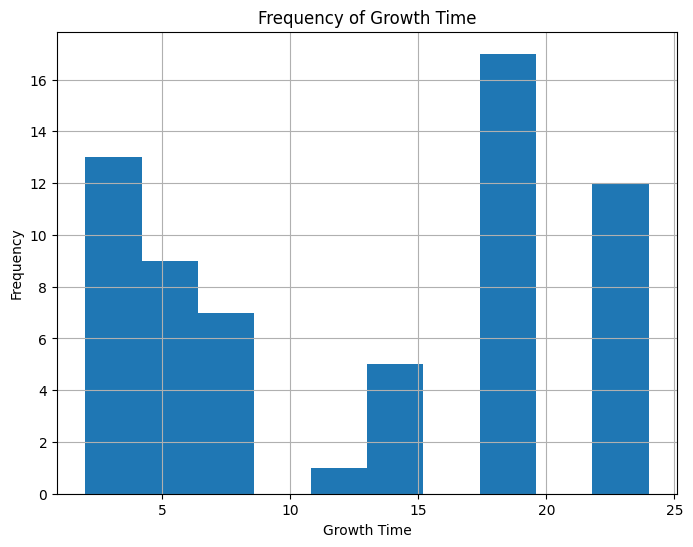

In [45]:
poke_url = "https://pokeapi.co/docs/v2#berries-section"
stats_output_file = "poke-API_statistics.csv"
raw_output_file = "all_berries_data.csv"
log_file = "log_file.txt"

log_progress("Requesting data to pokeAPI", log_file)
api_request = url_request(poke_url)

log_progress("Performing some web scraping to gather data...", log_file)
berry_url_template = web_scraping(api_request)[0]
headers = web_scraping(api_request)[1]

log_progress("Extracting juice from berries...", log_file)
berry_df = extracting_json(berry_url_template, headers)

log_progress("Transforming berries data", log_file)
transfromed_berry_df = transforming_data(berry_df)

log_progress("Generating CSV file", log_file)
load_to_csv(transfromed_berry_df, stats_output_file)
print(load_to_csv(berry_df, raw_output_file))

log_progress("Ploting Histogram", log_file)
plt.figure(figsize=(8, 6))
plt.hist(transfromed_berry_df['frequency_growth_time'].values[0].keys(), weights=transfromed_berry_df['frequency_growth_time'].values[0].values(), bins=len(transfromed_berry_df['frequency_growth_time'].values[0]))
plt.title('Frequency of Growth Time')
plt.xlabel('Growth Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()